In [1]:
import cv2
import glob
import io
import matplotlib.pyplot as plt
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [2]:
class EigenfacesDataset(Dataset):

    def __init__(self, data_dir, transform=None):
        """
        Arguments:
            data_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.img_path_list = [
            i for i in sorted(glob.glob("{}/**/*.pgm".format(data_dir))) \
            if self.get_labels(i)['scale'] == 1]
        self.transform = transform

    def __len__(self):
        return len(self.img_path_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.img_path_list[idx]
        image = cv2.imread(img_path, -1)
        if self.transform:
            image = torch.squeeze(self.transform(image))

        labels = self.get_labels(img_path)
        sample = labels.copy()
        sample.pop('scale')
        sample['image'] = image

        return sample

    def get_labels(self, img_path):
        img_name = os.path.splitext(os.path.basename(img_path))[0]
        img_name_split = img_name.split('_')

        user_id = img_name_split[0]
        head_position = img_name_split[1]
        facial_expression = img_name_split[2]
        eye_state = img_name_split[3]

        if len(img_name_split) == 5:
            scale = int(img_name_split[4])
        else:
            scale = 1
        
        labels = {
            'user_id': user_id,
            'head_position': head_position,
            'facial_expression': facial_expression,
            'eye_state': eye_state,
            'scale': scale}
        return labels

In [3]:
normalize_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])
eigenfaces_dataset = EigenfacesDataset(data_dir='../data', transform=normalize_transform)
eigenfaces_dataloader = DataLoader(eigenfaces_dataset)

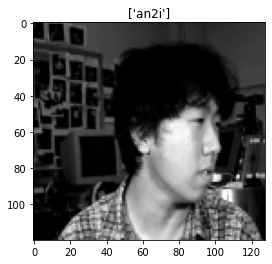

In [4]:
for sample in eigenfaces_dataloader:
    image = torch.squeeze(sample['image'])
    plt.title(sample['user_id'])
    plt.imshow(image, cmap='gray')
    break